This notebook generates a hypothetical situation calculating parallel computing time for a given number of tasks and processors. 
The goal is to show how the time to complete a task decreases as the number of processors increases.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data_path = pathlib.Path("../data/parallel_compute_analysis.csv").resolve()
df = pd.read_csv(data_path)
df.head()

,sequences,time_per_sequence(s),core_count
0,10,0.5,1
1,100,0.5,1
2,1000,0.5,1
3,10000,0.5,1
4,100000,0.5,1


In [3]:
df["time(s)"] = df["sequences"] / df["core_count"] * df["time_per_sequence(s)"]
# log 10 transform the data
df["sequences"] = df["sequences"].apply(np.log10)

# convert to hours
df["time(h)"] = df["time(s)"] / 3600
df["time(d)"] = df["time(h)"] / 24

In [4]:
df["core_count"].unique()
# make each core count a different color
colors = sns.color_palette("husl", len(df["core_count"].unique()))
color_dict = dict(zip(df["core_count"].unique(), colors))

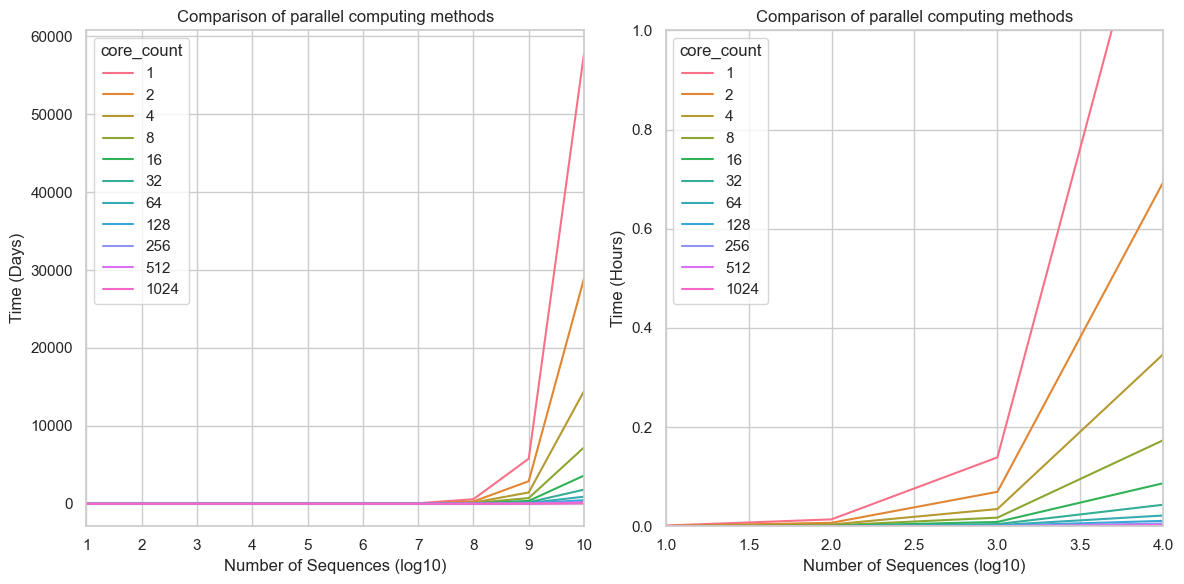

In [5]:
# plot the results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# custom palette
custom_palette = color_dict

plt.subplot(1, 2, 1)
sns.lineplot(
    x="sequences", y="time(d)", hue="core_count", data=df, palette=custom_palette
)
plt.xlabel("Number of Sequences (log10)")
plt.ylabel("Time (Days)")
plt.title("Comparison of parallel computing methods")
plt.xlim(1, max(df["sequences"]))

plt.subplot(1, 2, 2)
sns.lineplot(
    x="sequences", y="time(h)", hue="core_count", data=df, palette=custom_palette
)
plt.xlabel("Number of Sequences (log10)")
plt.ylabel("Time (Hours)")
plt.title("Comparison of parallel computing methods")
plt.xlim(1, 4)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()